In [1]:
import cartopy
import cartopy.crs as crs
import cartopy.feature as cfeature
import cfbd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import pandas as pd

<GeoAxesSubplot:>

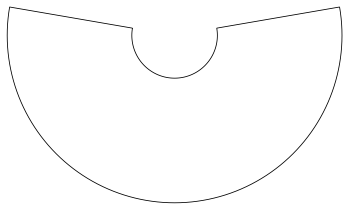

In [2]:
plt.axes(projection=crs.AlbersEqualArea())

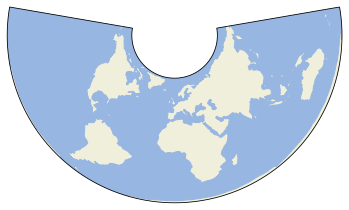

In [3]:
ax = plt.axes(projection=crs.AlbersEqualArea())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

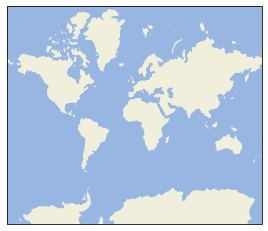

In [4]:
ax = plt.axes(projection=crs.Mercator())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

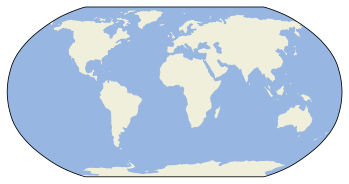

In [5]:
ax = plt.axes(projection=crs.Robinson())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

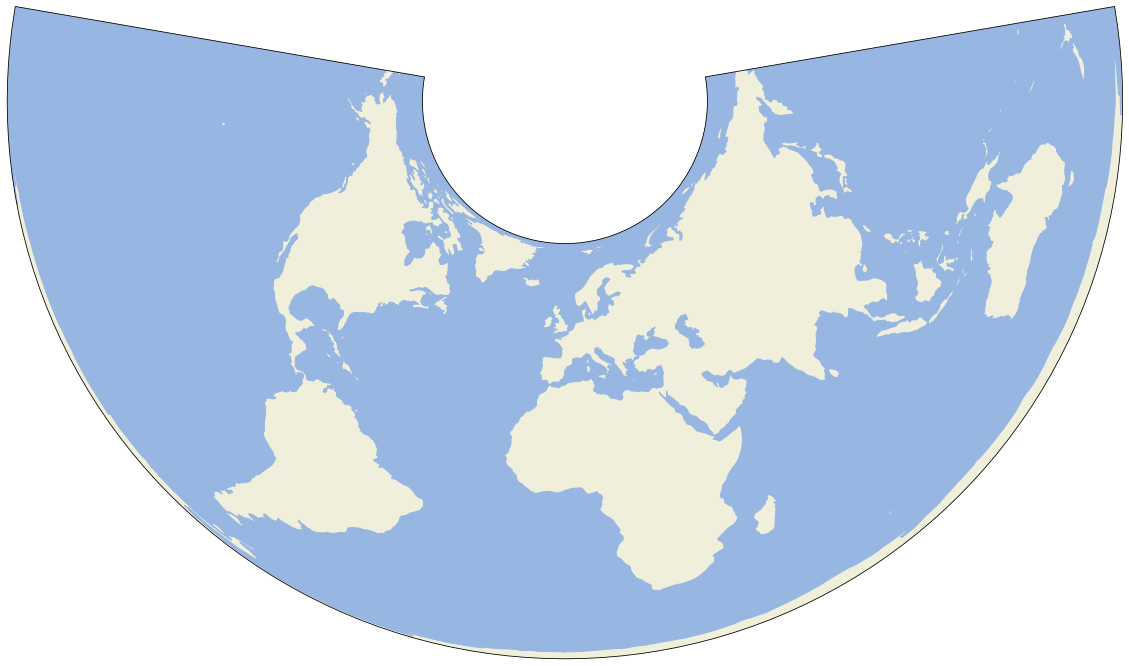

In [6]:
plt.figure(figsize=(24, 12))
ax = plt.axes(projection=crs.AlbersEqualArea())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

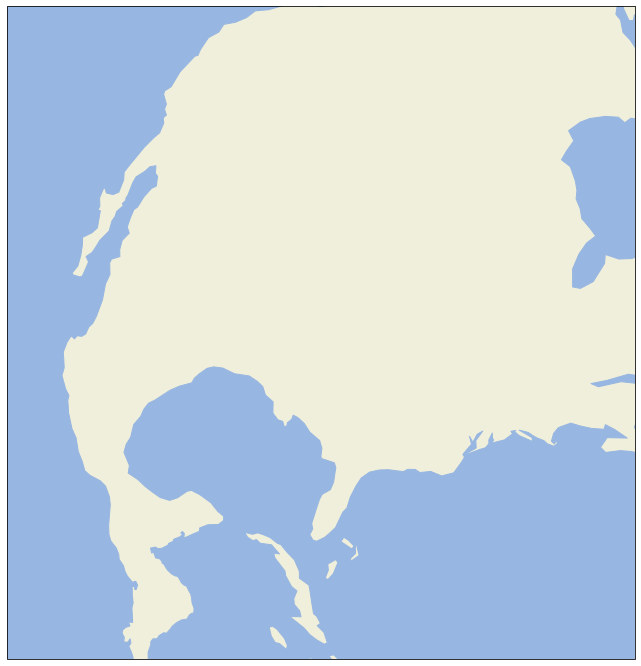

In [7]:
plt.figure(figsize=(24, 12))
ax = plt.axes(projection=crs.AlbersEqualArea())

extent = [-120, -70, 22, 51]

ax.set_extent(extent)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

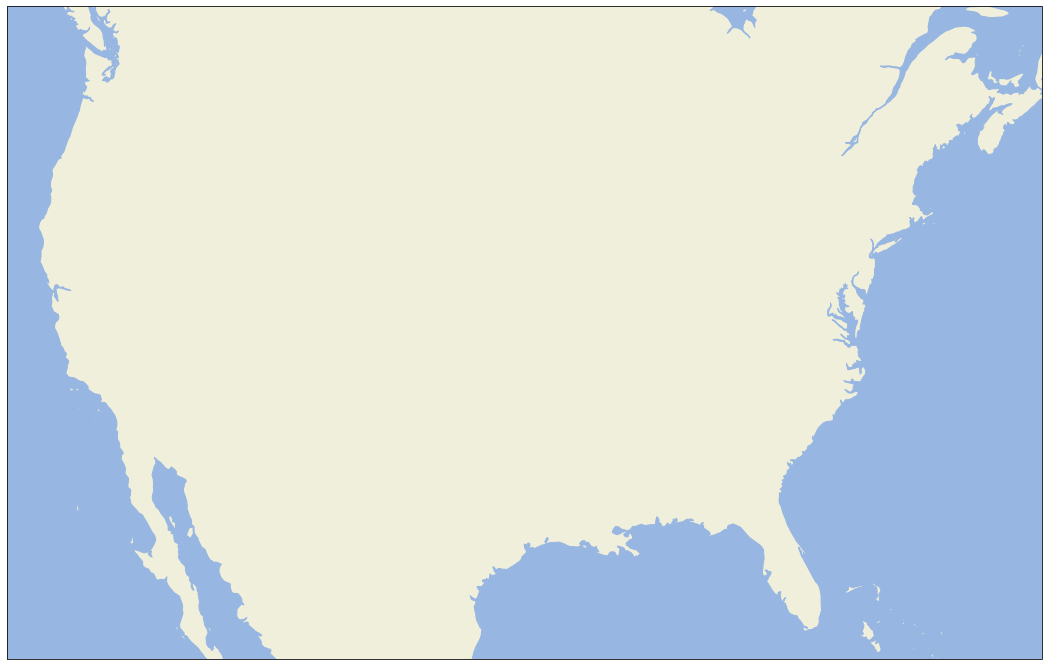

In [8]:
plt.figure(figsize=(24, 12))

extent = [-120, -70, 22, 51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

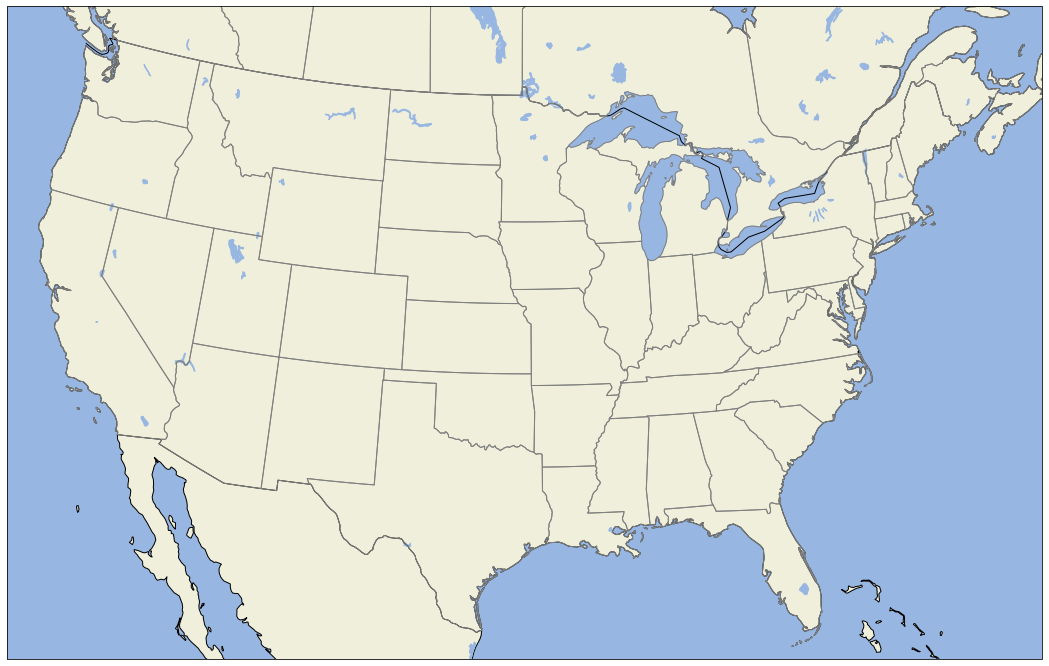

In [9]:
plt.figure(figsize=(24, 12))

extent = [-120, -70, 22, 51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

In [10]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'your_api_key_here'
configuration.api_key_prefix['Authorization'] = 'Bearer'
client = cfbd.ApiClient(configuration)

In [12]:
year = 2021
classification = 'HighSchool'

api_instance = cfbd.RecruitingApi(client)
croots = api_instance.get_recruiting_players(year=year, classification=classification)

croots[0:2]

[{'city': 'Corona',
  'committed_to': 'USC',
  'country': 'USA',
  'height': 76,
  'hometown_info': {'fipsCode': '06065',
                    'latitude': '33.8752945',
                    'longitude': '-117.5664449'},
  'name': 'Korey Foreman',
  'position': 'SDE',
  'ranking': 1,
  'rating': 0.9994,
  'recruit_type': 'HighSchool',
  'school': 'Centennial',
  'stars': 5,
  'state_province': 'CA',
  'weight': 265,
  'year': 2021},
 {'city': 'Bradenton',
  'committed_to': 'Alabama',
  'country': 'USA',
  'height': 78,
  'hometown_info': {'fipsCode': '12081',
                    'latitude': '27.4989278',
                    'longitude': '-82.5748194'},
  'name': 'JC Latham',
  'position': 'OT',
  'ranking': 2,
  'rating': 0.999,
  'recruit_type': 'HighSchool',
  'school': 'IMG Academy',
  'stars': 5,
  'state_province': 'FL',
  'weight': 305,
  'year': 2021}]

In [13]:
df = pd.DataFrame().from_records([
    dict(
        rating=c.rating,
        stars=c.stars,
        college=c.committed_to,
        lat=c.hometown_info['latitude'],
        lon=c.hometown_info['longitude'])
    for c in croots
    if c.state_province is not None and len(c.state_province) == 2 and c.state_province != 'AS' and c.state_province != 'QC' and c.state_province != 'HI'])

df.head()

,rating,stars,college,lat,lon
0,0.9994,5,USC,33.8752945,-117.5664449
1,0.9990,5,Alabama,27.4989278,-82.5748194
2,0.9990,5,None,47.6088445,-122.0423067
3,0.9980,5,Ohio State,39.896277299999994,-82.77319049748806
4,0.9978,5,Alabama,32.753177,-97.3327459


In [14]:
teams = cfbd.TeamsApi(client).get_teams()
teams_df = pd.DataFrame().from_records([dict(team_id=t.id, team=t.school, conference=t.conference) for t in teams])

df = df.merge(teams_df, left_on='college', right_on='team')
df.head()

,rating,stars,college,lat,lon,team_id,team,conference
0,0.9994,5,USC,33.8752945,-117.5664449,30,USC,Pac-12
1,0.9748,4,USC,33.7494951,-117.8732213,30,USC,Pac-12
2,0.9695,4,USC,40.5246711,-111.8638226,30,USC,Pac-12
3,0.9665,4,USC,34.687584,-120.43901754304565,30,USC,Pac-12
4,0.9638,4,USC,34.0536909,-118.2427666,30,USC,Pac-12


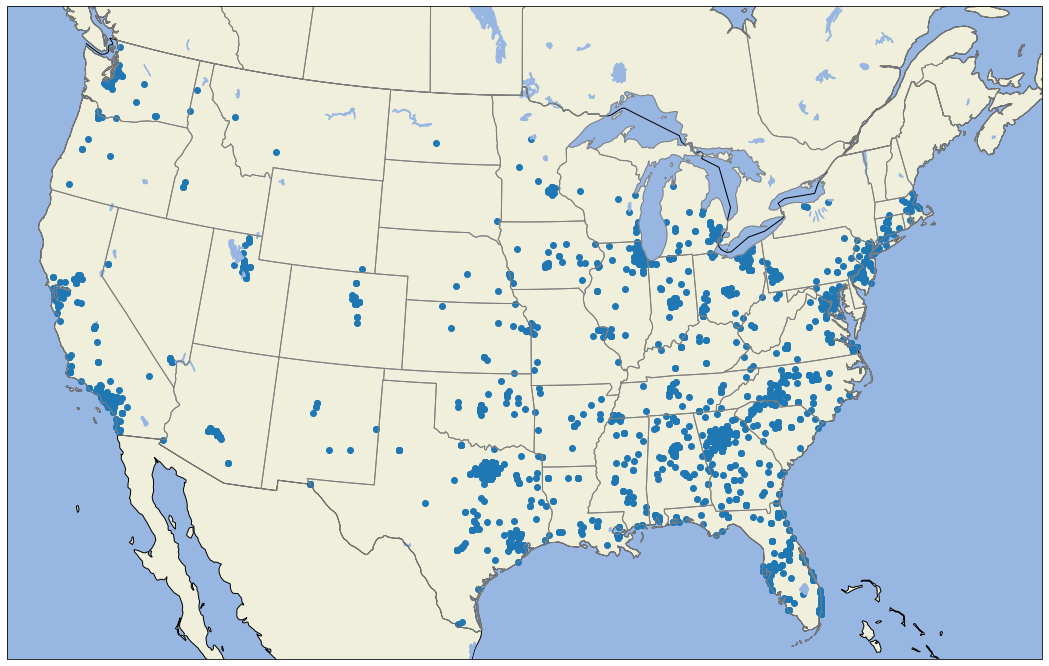

In [15]:
plt.figure(figsize=(24, 12))

extent = [-120, -70, 22, 51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

plt.scatter(
    x=df.lon.astype('float64'),
    y=df.lat.astype('float64'),
    transform=crs.PlateCarree()
)

In [16]:
def getImage(id):
    return OffsetImage(plt.imread("./logos/{0}.png".format(id)))

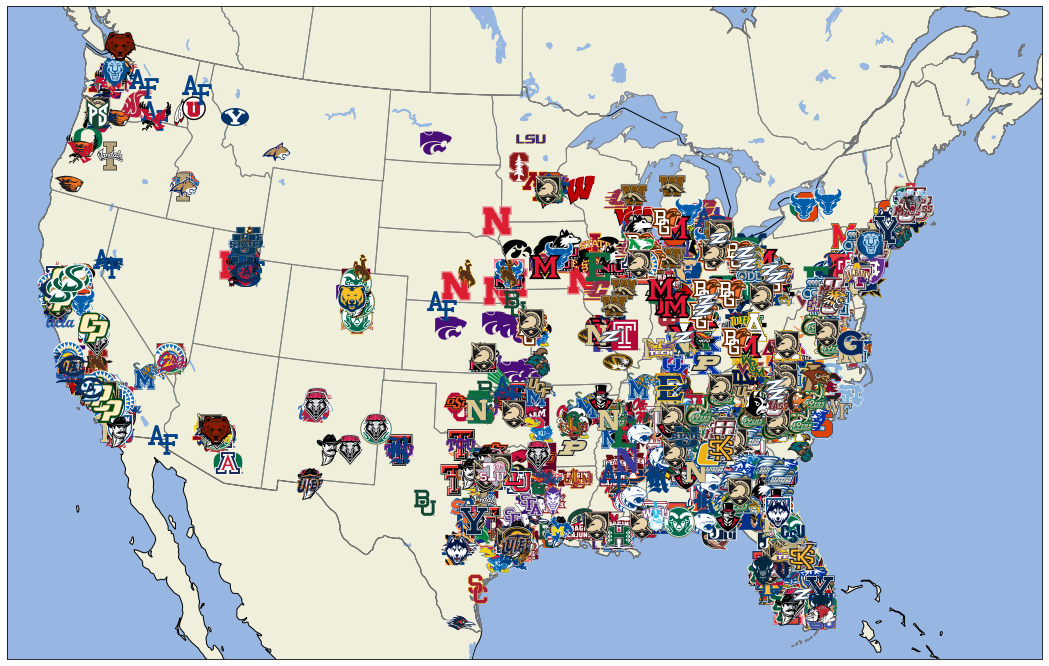

In [17]:
plt.figure(figsize=(24, 12))

extent = [-120, -70, 22, 51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

plt.scatter(
    x=df.lon.astype('float64'),
    y=df.lat.astype('float64'),
    alpha=0,
    transform=crs.PlateCarree()
)

transform = crs.PlateCarree()._as_mpl_transform(ax)
for x0, y0, path in zip(df.lon, df.lat, df['team_id']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, xycoords=transform)
    ax.add_artist(ab)

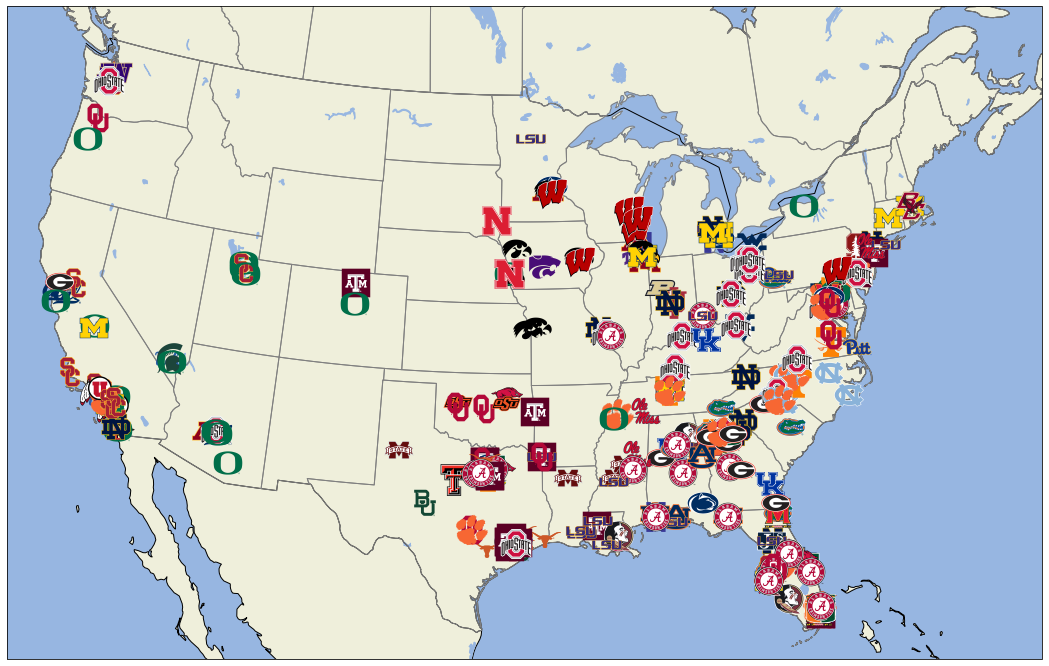

In [18]:
filtered = df.query("stars > 3").sort_values('rating')

plt.figure(figsize=(24, 12))

extent = [-120, -70, 22, 51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

plt.scatter(
    x=filtered.lon.astype('float64'),
    y=filtered.lat.astype('float64'),
    alpha=0,
    transform=crs.PlateCarree()
)

transform = crs.PlateCarree()._as_mpl_transform(ax)
for x0, y0, path in zip(filtered.lon, filtered.lat, filtered['team_id']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, xycoords=transform)
    ax.add_artist(ab)

In [19]:
def create_map(dataset):
    plt.figure(figsize=(24, 12))

    extent = [-120, -70, 22, 51]

    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])

    ax = plt.axes(projection=crs.AlbersEqualArea(central_lon, central_lat))
    ax.set_extent(extent)

    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='gray')

    plt.scatter(
        x=dataset.lon.astype('float64'),
        y=dataset.lat.astype('float64'),
        alpha=0,
        transform=crs.PlateCarree()
    )

    transform = crs.PlateCarree()._as_mpl_transform(ax)
    for x0, y0, path in zip(dataset.lon, dataset.lat, dataset['team_id']):
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, xycoords=transform)
        ax.add_artist(ab)

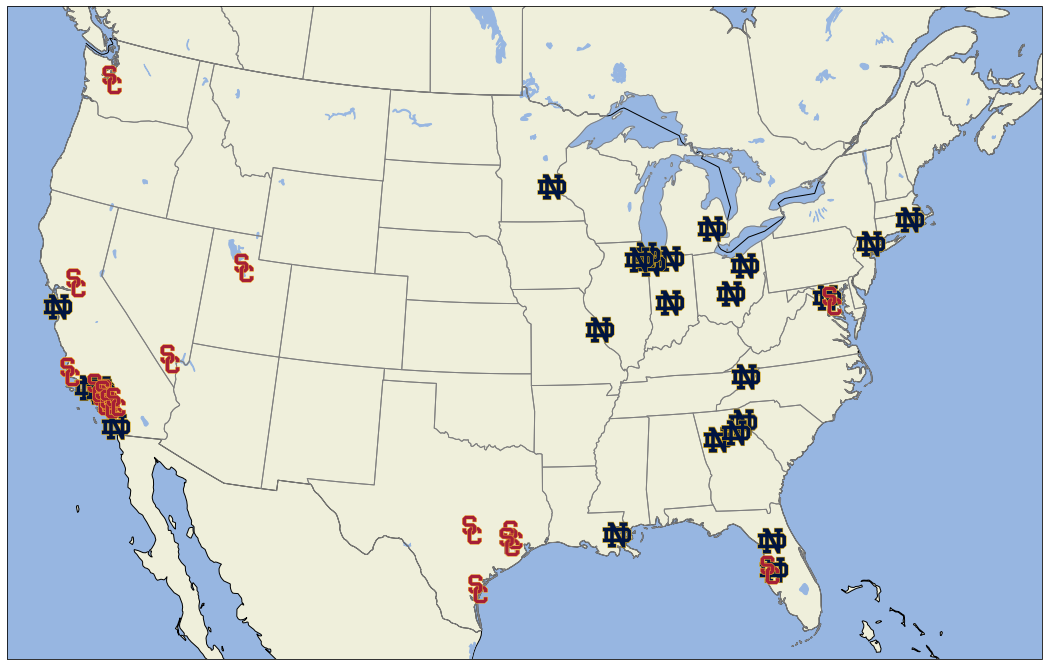

In [20]:
filtered = df.query("team == 'USC' or team == 'Notre Dame'").sort_values('rating')
create_map(filtered)

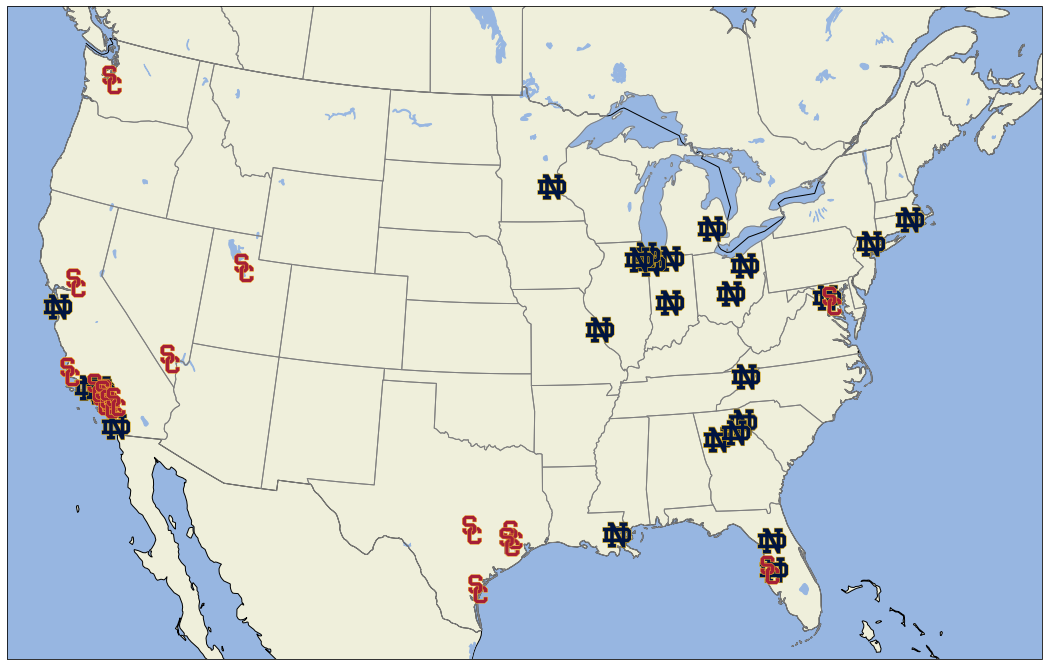

In [21]:
filtered = df.query("team == 'USC' or team == 'Notre Dame'").sort_values('rating')
create_map(filtered)